In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [4]:
wine_df = pd.read_csv('winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:

len(wine_df)

1599

In [6]:
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[: , -1]

In [7]:
X = np.append(arr = np.ones((X.shape[0],1)), values = X, axis = 1)

In [8]:
X

array([[ 1.   ,  7.4  ,  0.7  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 1.   ,  7.8  ,  0.88 , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 1.   ,  7.8  ,  0.76 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 1.   ,  6.3  ,  0.51 , ...,  3.42 ,  0.75 , 11.   ],
       [ 1.   ,  5.9  ,  0.645, ...,  3.57 ,  0.71 , 10.2  ],
       [ 1.   ,  6.   ,  0.31 , ...,  3.39 ,  0.66 , 11.   ]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
X_train.shape

(1199, 12)

In [11]:
X_test.shape

(400, 12)

In [12]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

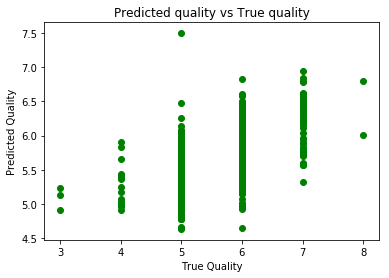

In [15]:

plt.scatter(y_test, y_pred, c ='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted quality vs True quality')
plt.show()

In [14]:
acc=lr.score(X_test,y_test)
acc

0.3182778501097092

In [16]:
print('Coefficients: \n', lr)

Coefficients: 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [17]:
predictions = lr.predict(X_test)

In [18]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5338563809738553
MSE: 0.45303009631749297
RMSE: 0.6730751045147139


In [1]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

NameError: name 'X' is not defined

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()